In [4]:
#ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV 

In [5]:
#importing the datasets
train_set = pd.read_csv('./outputs/train_set_augmented_simplified.csv')
test_set = pd.read_csv('./outputs/test_set_augmented_simplified.csv')

In [6]:
#Split into features and target; x = features, y = target
x_train = train_set.iloc[:, 1:]
y_train = train_set['label']

x_test = test_set.iloc[:, 1:]
y_test = test_set['label']

#combining test and train set for cross validation
x = pd.concat([x_train, x_test])
y = pd.concat([y_train, y_test])

In [7]:
clf = SVC()
clf.fit(x_train, y_train)

SVC()

In [8]:
y_cross_scores = cross_val_score(clf, x, y, cv=5, scoring = 'accuracy')
print("%0.2f%% accuracy with a standard deviation of %0.2f%%" % (y_cross_scores.mean()*100, y_cross_scores.std()*100))

66.06% accuracy with a standard deviation of 0.72%


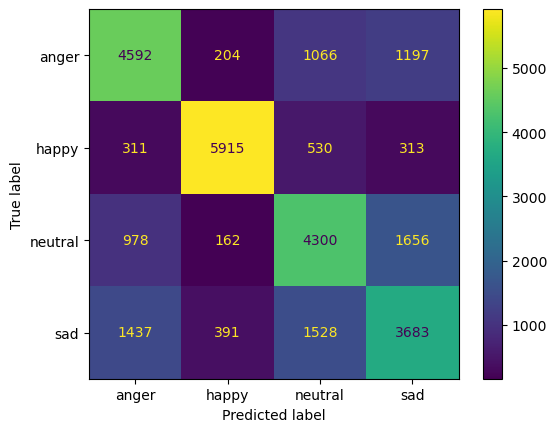

In [9]:
y_cross_predict = cross_val_predict(clf, x_train, y_train, cv = 5) 
y_cross_cm = confusion_matrix(y_train, y_cross_predict)
y_cross_display = ConfusionMatrixDisplay(confusion_matrix=y_cross_cm, display_labels=clf.classes_)
y_cross_display.plot()

In [10]:
print("The mean accuracy of the given test data and labels is: %0.2f%%" %(clf.score(x_test, y_test) * 100))

The mean accuracy of the given test data and labels is: 66.97%


In [11]:
y_pred = clf.predict(x_test)

In [12]:
print("The mean accuracy of the given test data and labels is: %0.2f%%" %(clf.score(x_test, y_test) * 100))

The mean accuracy of the given test data and labels is: 66.97%


In [13]:
y_pred_accuracy = accuracy_score(y_test, y_pred)
y_pred_precision = precision_score(y_test, y_pred, average='macro')
y_pred_recall = recall_score(y_test, y_pred, average='macro')
y_pred_f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: ", y_pred_accuracy*100)
print("Precision: ", y_pred_precision*100)
print("Recall: ", y_pred_recall*100)
print("F1: ", y_pred_f1*100)

Accuracy:  66.96935300794551
Precision:  65.95929971493132
Recall:  65.76025374924207
F1:  65.83261391676677


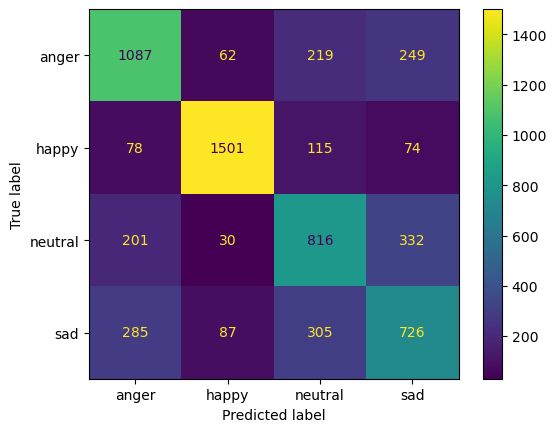

In [14]:
y_pred_cm = confusion_matrix(y_test, y_pred)
y_pred_display = ConfusionMatrixDisplay(confusion_matrix=y_pred_cm, display_labels=clf.classes_)
y_pred_display.plot()

# Hyperparameter Tuning

In [15]:
#Hyperparameter Tuning paramenters
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 

In [16]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
grid.fit(x_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.653 total time= 4.4min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.672 total time= 4.3min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.671 total time= 4.4min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.658 total time= 4.6min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.662 total time= 4.6min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.626 total time= 5.6min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.643 total time= 5.5min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.638 total time= 5.7min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.622 total time= 7.4min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.631 total time= 6.7min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.463 total time= 8.2min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [17]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1)
